In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [2]:
data = glob.glob('youtube-dataset\\*.csv')

In [3]:
#Multinomial Naïve Bayes Classifier - the YouTube Dataset
# This is a project using Naive Bayes to classify comments as spam or not spam (ham)

In [4]:
data

[]

In [5]:
file1 = pd.read_csv('C:/Users/bbsj4/Desktop/DATA SCIENCE/Supervised Machine Learning Bootcamp/Naive Bayes/Notebooks_and_Dataset/youtube-dataset/Youtube01.csv')

In [6]:
file2 = pd.read_csv('C:/Users/bbsj4/Desktop/DATA SCIENCE/Supervised Machine Learning Bootcamp/Naive Bayes/Notebooks_and_Dataset/youtube-dataset/Youtube02.csv')
file3 = pd.read_csv('C:/Users/bbsj4/Desktop/DATA SCIENCE/Supervised Machine Learning Bootcamp/Naive Bayes/Notebooks_and_Dataset/youtube-dataset/Youtube03.csv')
file4 = pd.read_csv('C:/Users/bbsj4/Desktop/DATA SCIENCE/Supervised Machine Learning Bootcamp/Naive Bayes/Notebooks_and_Dataset/youtube-dataset/Youtube04.csv')
file5 = pd.read_csv('C:/Users/bbsj4/Desktop/DATA SCIENCE/Supervised Machine Learning Bootcamp/Naive Bayes/Notebooks_and_Dataset/youtube-dataset/Youtube05.csv')

In [7]:
all_files = pd.concat([file1,file2,file3,file4,file5])

In [8]:
all_files.head()

COMMENT_ID            AUTHOR  \
0  LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU         Julius NM   
1  LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A       adam riyati   
2  LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8  Evgeny Murashkin   
3          z13fwbwp1oujthgqj04chlngpvzmtt3r3dw            GsMega   
4  LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc      Jason Haddad   

                  DATE                                            CONTENT  \
0  2013-11-07T06:20:48  Huh, anyway check out this you[tube] channel: ...   
1  2013-11-07T12:37:15  Hey guys check out my new channel and our firs...   
2  2013-11-08T17:34:21             just for test I have to say murdev.com   
3  2013-11-10T16:05:38            watch?v=vtaRGgvGtWQ   Check this out .﻿   
4  2013-11-26T02:55:11  Hey, check out my new website!! This site is a...   

   CLASS  
0      1  
1      1  
2      1  
3      1  
4      1

In [9]:
all_df = all_files.drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis = 1)
all_df.head()

CONTENT  CLASS
0  Huh, anyway check out this you[tube] channel: ...      1
1  Hey guys check out my new channel and our firs...      1
2             just for test I have to say murdev.com      1
3            watch?v=vtaRGgvGtWQ   Check this out .﻿      1
4  Hey, check out my new website!! This site is a...      1

In [10]:
all_df.describe()

CLASS
count  1955.000000
mean      0.513555
std       0.499944
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000

In [11]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1955 entries, 0 to 369
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CONTENT  1955 non-null   object
 1   CLASS    1955 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.8+ KB


In [12]:
all_df.isnull().sum()
#tells if you have any missing values

CONTENT    0
CLASS      0
dtype: int64

In [13]:
all_df.value_counts(['CLASS'])

CLASS
1        1004
0         951
dtype: int64

In [14]:
#tells the number in spam v ham because they need to be roughy equal

In [15]:
inputs = all_df['CONTENT']
target = all_df['CLASS']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(inputs,target, test_size = 0.2, random_state = 365, stratify = target)
# make sure you split before you transform

In [17]:
y_train.value_counts(normalize = True)

1    0.513427
0    0.486573
Name: CLASS, dtype: float64

In [18]:
#1 is spam and about 51% of data
# next we start tokenizing

vectorizer = CountVectorizer()

In [19]:
x_train_transf = vectorizer.fit_transform(x_train)
x_test_transf = vectorizer.transform(x_test)

In [20]:
x_train_transf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
x_train_transf.shape
#first number is row for each comment, second number is the individual word(s)

(1564, 3925)

In [22]:
#define naive bayes classifier and evaluate performance
#performing the classification
clf = MultinomialNB()
#let the model learn from the training data
clf.fit(x_train_transf, y_train)


MultinomialNB()

In [23]:
np.exp(clf.class_log_prior_)
clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [24]:
#stores the predictions the model made on the test data set


In [25]:
x_test_transf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
y_test_pred = clf.predict(x_test_transf)

In [27]:
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_predictions'

In [28]:
# above is attempt to create confusion matrix by providing the true and the predicted values as arguments.

In [29]:
print(classification_report(y_test, y_test_pred, target_names = ['ham', 'spam']))

              precision    recall  f1-score   support

         ham       0.97      0.88      0.92       190
        spam       0.89      0.98      0.93       201

    accuracy                           0.93       391
   macro avg       0.93      0.93      0.93       391
weighted avg       0.93      0.93      0.93       391



Accuracy is the performance of the whole model. Precision and recall show the accuracy of predicting the different types within the model (ham, spam). Precision is the true positives over all predicted as positive, so if you defined your variables as 0 and 1, it would be the accuracy of the variable you assigned as 1 (in this case spam). (accuracy for a specific class)

Recall is the true positives over the total types that have a true class of positive (meaning true positives over (true positives plus false negatives) (how many in each class did the model catch)

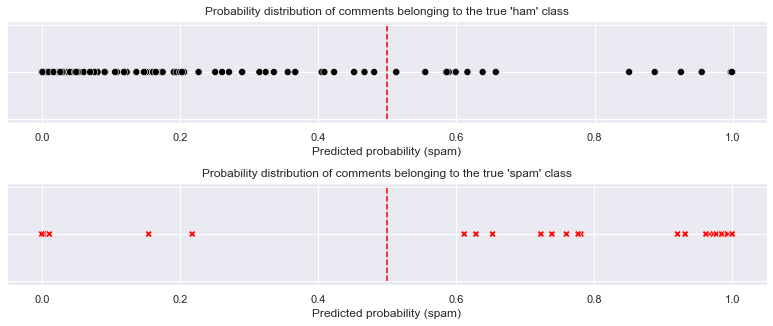

In [30]:
#Creating probability-distribution figures
# For each ovservation, store its probability of being a spam. Round it to 3 digits after the decimal points.
# These probabilities will later serve as the x-coordinates of a scatter plot
spam_proba = clf.predict_proba(x_test_transf).round(3)[:,1];

# Create a new data frame which will store the true classes, the predicted classes and the predicted probability
# for an observation to belong to the spam class
df_scatter = pd.DataFrame()

# Create the columns of the data frame
df_scatter['True class'] = y_test
df_scatter['Predicted class'] = y_test_pred
df_scatter['Predicted probability (spam)'] = spam_proba

# Reset the index of the data frame, so that the indexing is sequential
df_scatter = df_scatter.reset_index(drop = True)

# Define two palettes for the different plots
palette_0 = sns.color_palette(['#000000'])
palette_1 = sns.color_palette(['#FF0000'])

# Create two new data frames. The first one stores the samples whose true class is 0.
# The second one stores the samples whose true class is 1.
df_scatter_0 = df_scatter[df_scatter['True class'] == 0].reset_index(drop = True)
df_scatter_1 = df_scatter[df_scatter['True class'] == 1].reset_index(drop = True)

# Set the seaborn style
sns.set()

# Create two subfigures, so that they are arranged in 2 rows and 1 column.
# Set the size of the figures
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,5))
fig.tight_layout(pad = 3)

# Create a scatter plot.
# On the x-axis, we have the predicted probability of a comment being a spam.
# The y-axis takes only one value - zero. We create an array full of zeros having a length equal to 
# the number of samples whose true class is 0.
# The 'data' parameter specifies the dataset we are drawing the columns from.
# The 'hue' parameter specifies the feature based on which the points are going to be colored. In this case,
# this feature has only a single class - the 0 class.
# The 's' parameter specifies the size of the points.
# The 'markers' parameter determines the shape of the points.
# The 'palette' parameter specifies the colors to be used in the plot.
# The 'style' parameter connects markers to classes.
# We have decided to set the 'legend' parameter equal to False as we have only one class in the plot. 
# We decide to remove the ticks from the y-axis as they can be chosen arbitrarily.
sns.scatterplot(x = 'Predicted probability (spam)', 
                y = np.zeros(df_scatter_0.shape[0]), 
                data = df_scatter_0,
                hue = 'True class', 
                s = 50,
                markers = ['o'],
                palette = palette_0,
                style = 'True class',
                legend = False, 
                ax = ax1).set(yticklabels=[])

# Set a title above the first plot.
ax1.set_title('Probability distribution of comments belonging to the true \'ham\' class')

# Create a red vertical dashed line passing through the point x = 0.5
# The first parameter specifies the x-coordinate.
# The second and third parameters specify the min and the max y-coordinates.
# We choose a dashed linestyle.
# We color the line in red.
ax1.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

# The comments above apply to this plot. The code is adapted to the spam class
sns.scatterplot(x = 'Predicted probability (spam)', 
                y = np.zeros(df_scatter_1.shape[0]), 
                hue = 'True class', 
                data = df_scatter_1,
                s = 50,
                palette = palette_1,
                markers = ['X'],
                style = 'True class',
                legend = False, 
                ax = ax2).set(yticklabels=[])

# Set a title above the second plot.
ax2.set_title('Probability distribution of comments belonging to the true \'spam\' class')

# Create a red vertical dahsed line for the second plot
ax2.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

In [31]:
#MAKING PREDICTIONS

# Using the vectorizer, transform the messages and store the result in a variable called 'predict_data'.
predict_data = vectorizer.transform(['This song reminds me of when I was young.',
                                     'Click to win 1m dollars right now!!!'])
clf.predict(predict_data)

array([0, 1], dtype=int64)

Success- the first statement is an example of a ham (0) and the second is an example of a spam (1). 